In [ ]:
pip install tensorflow


  Using cached tensorflow-2.1.0-cp37-cp37m-manylinux2010_x86_64.whl (421.8 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.2.2.tar.gz (10 kB)
  Using cached absl-py-0.9.0.tar.gz (104 kB)
  Using cached tensorboard-2.1.1-py3-none-any.whl (3.8 MB)
  Using cached opt_einsum-3.2.1-py3-none-any.whl (63 kB)
  Using cached protobuf-3.11.3-cp37-cp37m-manylinux1_x86_64.whl (1.3 MB)
  Using cached tensorflow_estimator-2.1.0-py2.py3-none-any.whl (448 kB)
  Using cached astor-0.8.1-py2.py3-none-any.whl (27 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached grpcio-1.28.1-cp37-cp37m-manylinux2010_x86_64.whl (2.8 MB)
  Using cached Markdown-3.2.1-py2.py3-none-any.whl (88 kB)
  Using cached google_auth_oauthlib-0.4.1-py2.py3-none-any.whl (18 kB)
     |████████████████████████████████| 89 kB 408 kB/s eta 0:00:01
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached rsa-4.0-py2.py3-none-any.whl (38 kB)
  Using cached pyasn1

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.models import load_model
from skimage.segmentation import mark_boundaries
from matplotlib import pyplot as plt
# %env CUDA_VISIBLE_DEVICES='1'
# %matplotlib inline

In [3]:
model = load_model('model_vgg16.h5')

W0128 13:40:35.463562 139722239452992 deprecation_wrapper.py:119] From /home/rveeramalli/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0128 13:40:35.488003 139722239452992 deprecation_wrapper.py:119] From /home/rveeramalli/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0128 13:40:35.512942 139722239452992 deprecation_wrapper.py:119] From /home/rveeramalli/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0128 13:40:35.792438 139722239452992 deprecation_wrapper.py:119] From /home/rveeramalli/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_gra

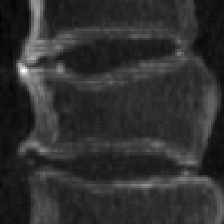

In [5]:
image_raw = load_img("cropped/Fracture/1036_T7.png", target_size=(224, 224))
image_raw

In [100]:
# Convert to numpy array, reshape and preprocess
image = img_to_array(image_raw)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)

In [101]:
image = image / 255

In [103]:
predictions = model.predict(image)

In [104]:
predictions

array([[1.596549e-04, 9.998404e-01]], dtype=float32)

In [105]:
decode_predictions(predictions)

ValueError: `decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: (1, 2)

In [106]:
model.predict(image).argsort()[0,-2:][::-1]

array([1, 0])

In [107]:
from lime.lime_image import LimeImageExplainer

In [108]:
explainer = LimeImageExplainer()

In [109]:
explanation = explainer.explain_instance(image[0], model.predict, 
                                         top_labels=2, num_samples=100,
                                         random_seed=42)

100% |########################################################################|


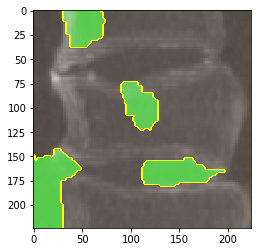

In [92]:
temp, mask = explanation.get_image_and_mask(1, positive_only=False, num_features=4, hide_rest=False)
# plot image and mask together
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

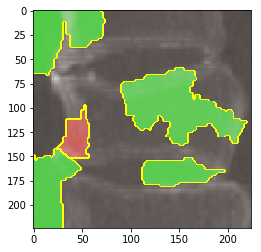

In [93]:
temp, mask = explanation.get_image_and_mask(1, positive_only=False, num_features=7, hide_rest=False)
# plot image and mask together
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

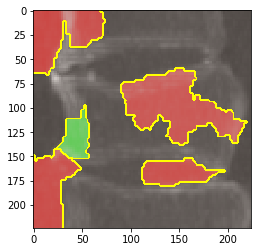

In [98]:
temp, mask = explanation.get_image_and_mask(0, positive_only=False, num_features=7, hide_rest=False)
# plot image and mask together
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

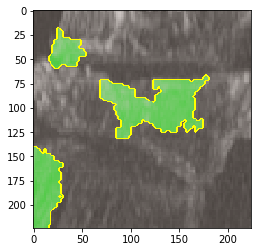

In [110]:
temp, mask = explanation.get_image_and_mask(1, positive_only=False, num_features=4, hide_rest=False)
# plot image and mask together
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

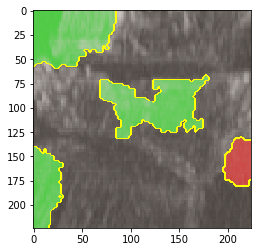

In [114]:
temp, mask = explanation.get_image_and_mask(1, positive_only=False, num_features=7, hide_rest=False)
# plot image and mask together
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [ ]:
#2nd image
Fracture/6005_T9.png
#1st image
Fracture/1036_T7.png